In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

In [14]:
dataset = load_dataset("lukebarousse/data_jobs")
df = pd.DataFrame(dataset['train'])

In [16]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [17]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"['bash', 'python', 'oracle', 'aws', 'ansible',..."


In [18]:
from pandas import notna


df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if notna(x) else x)

In [19]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

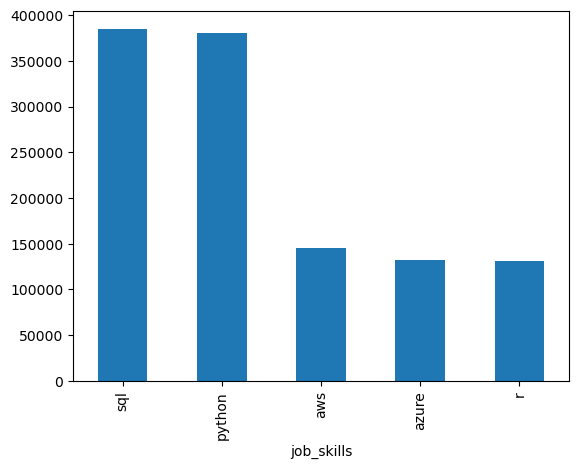

In [22]:
df_exploded.value_counts('job_skills').nlargest(5).plot(kind = 'bar')

In [39]:
skill_counts = df_exploded.groupby([ 'job_title_short', 'job_skills']).size()

In [40]:
df_skills_count = skill_counts.reset_index(name='counts')

In [41]:
df_skills_count = df_skills_count.sort_values(by='counts', ascending=False)

<Axes: >

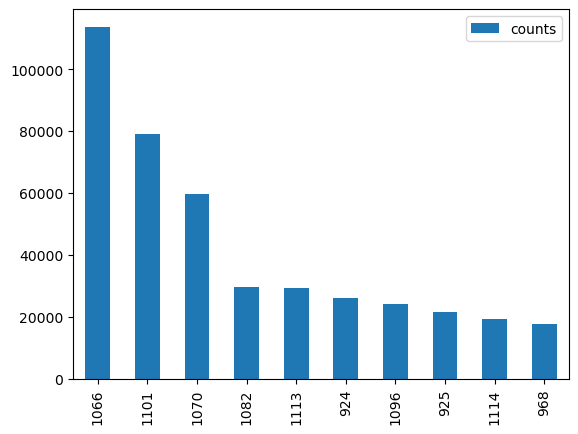

In [34]:
df_skills_count[df_skills_count['job_title_short'] == 'Data Scientist'].head(10).plot(kind = 'bar')

In [44]:
Job_title = 'Data Scientist'
top_n = 10

df_skill_f = df_skills_count[df_skills_count['job_title_short'] == Job_title].head(top_n)

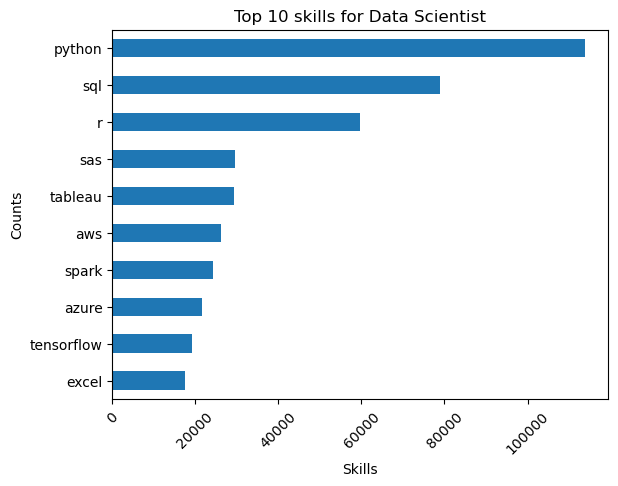

In [47]:
df_skill_f.plot(x='job_skills', y='counts', kind='barh', legend=False)
plt.title(f'Top {top_n} skills for {Job_title}')
plt.gca().invert_yaxis()
plt.xlabel('Skills')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()